In [12]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Logistic%20Regression/diabetes.csv")

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\Users\aswan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\aswan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\aswan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

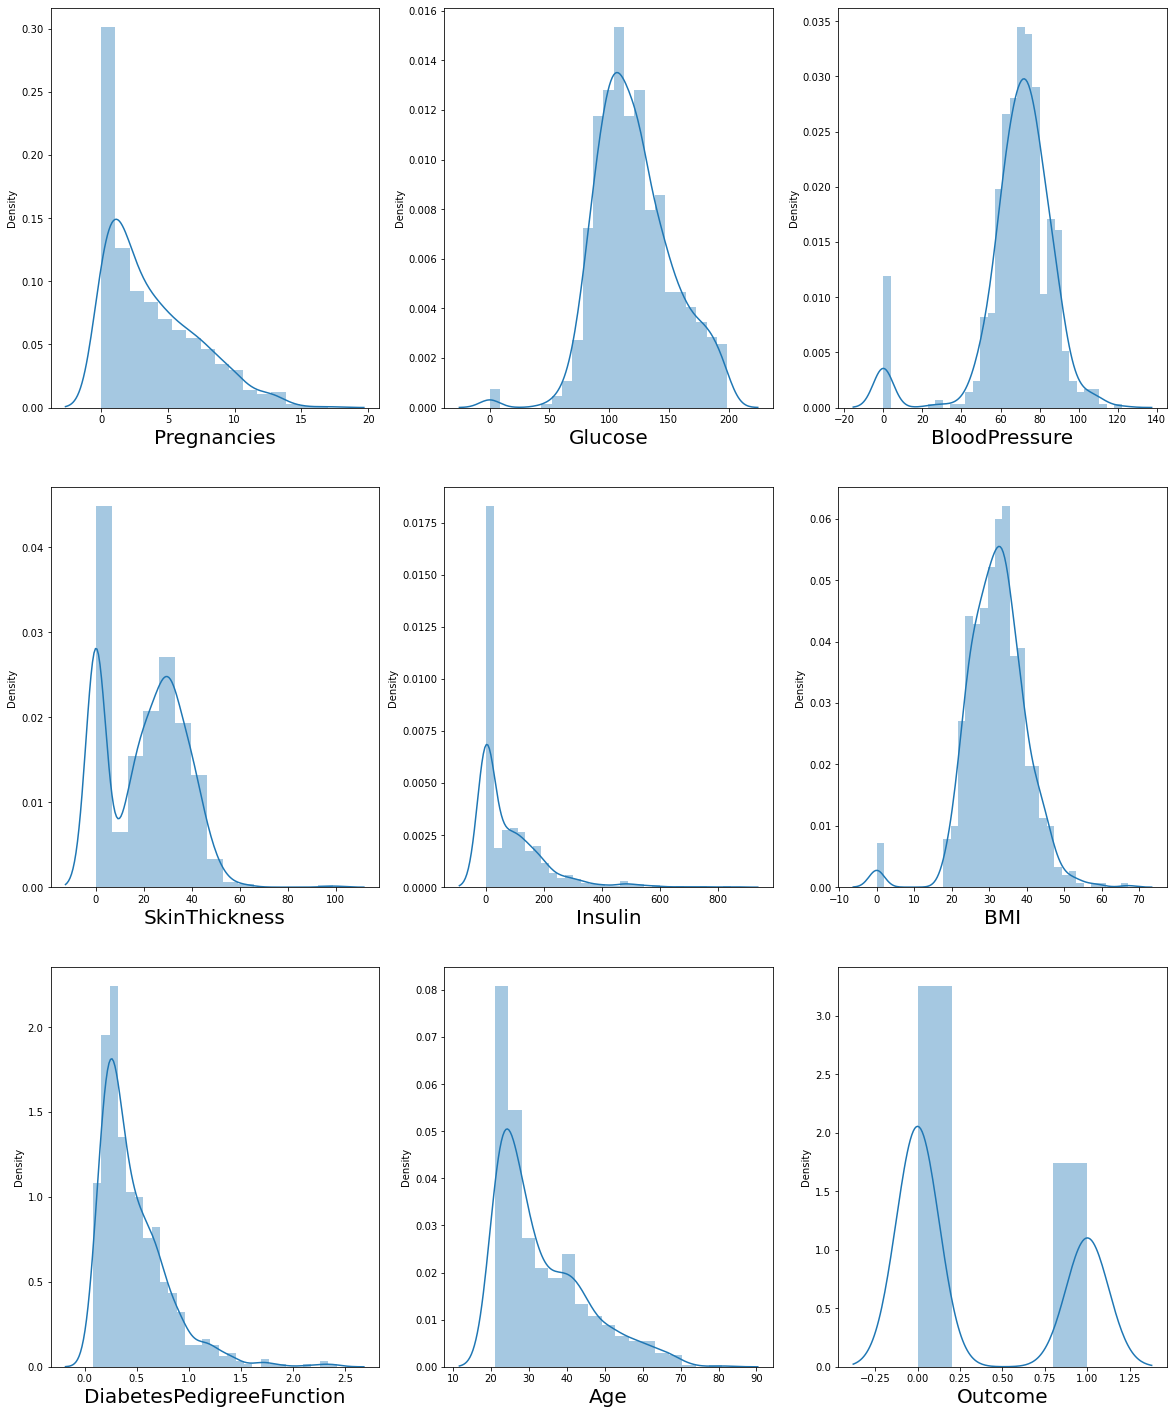

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

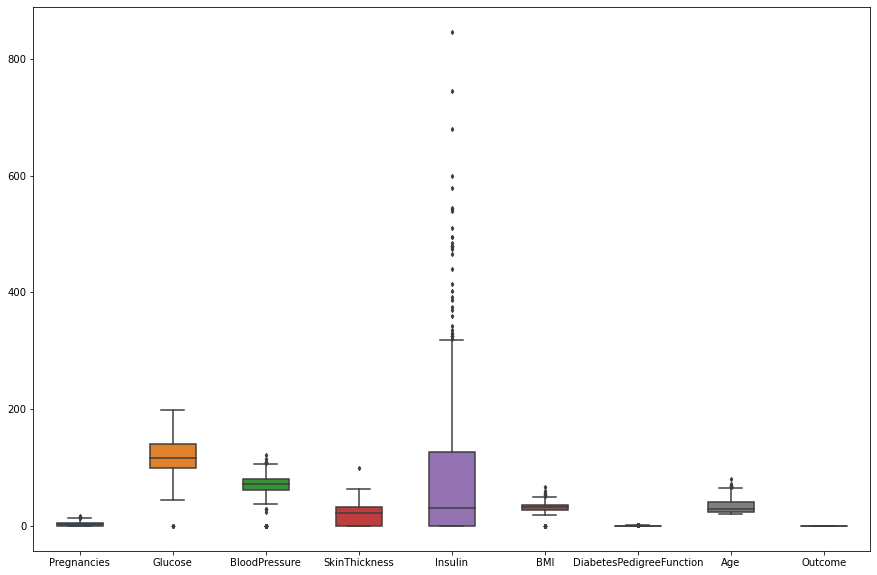

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5, ax=ax, fliersize=3)

c:\Users\aswan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\aswan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\aswan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\aswan\anacond

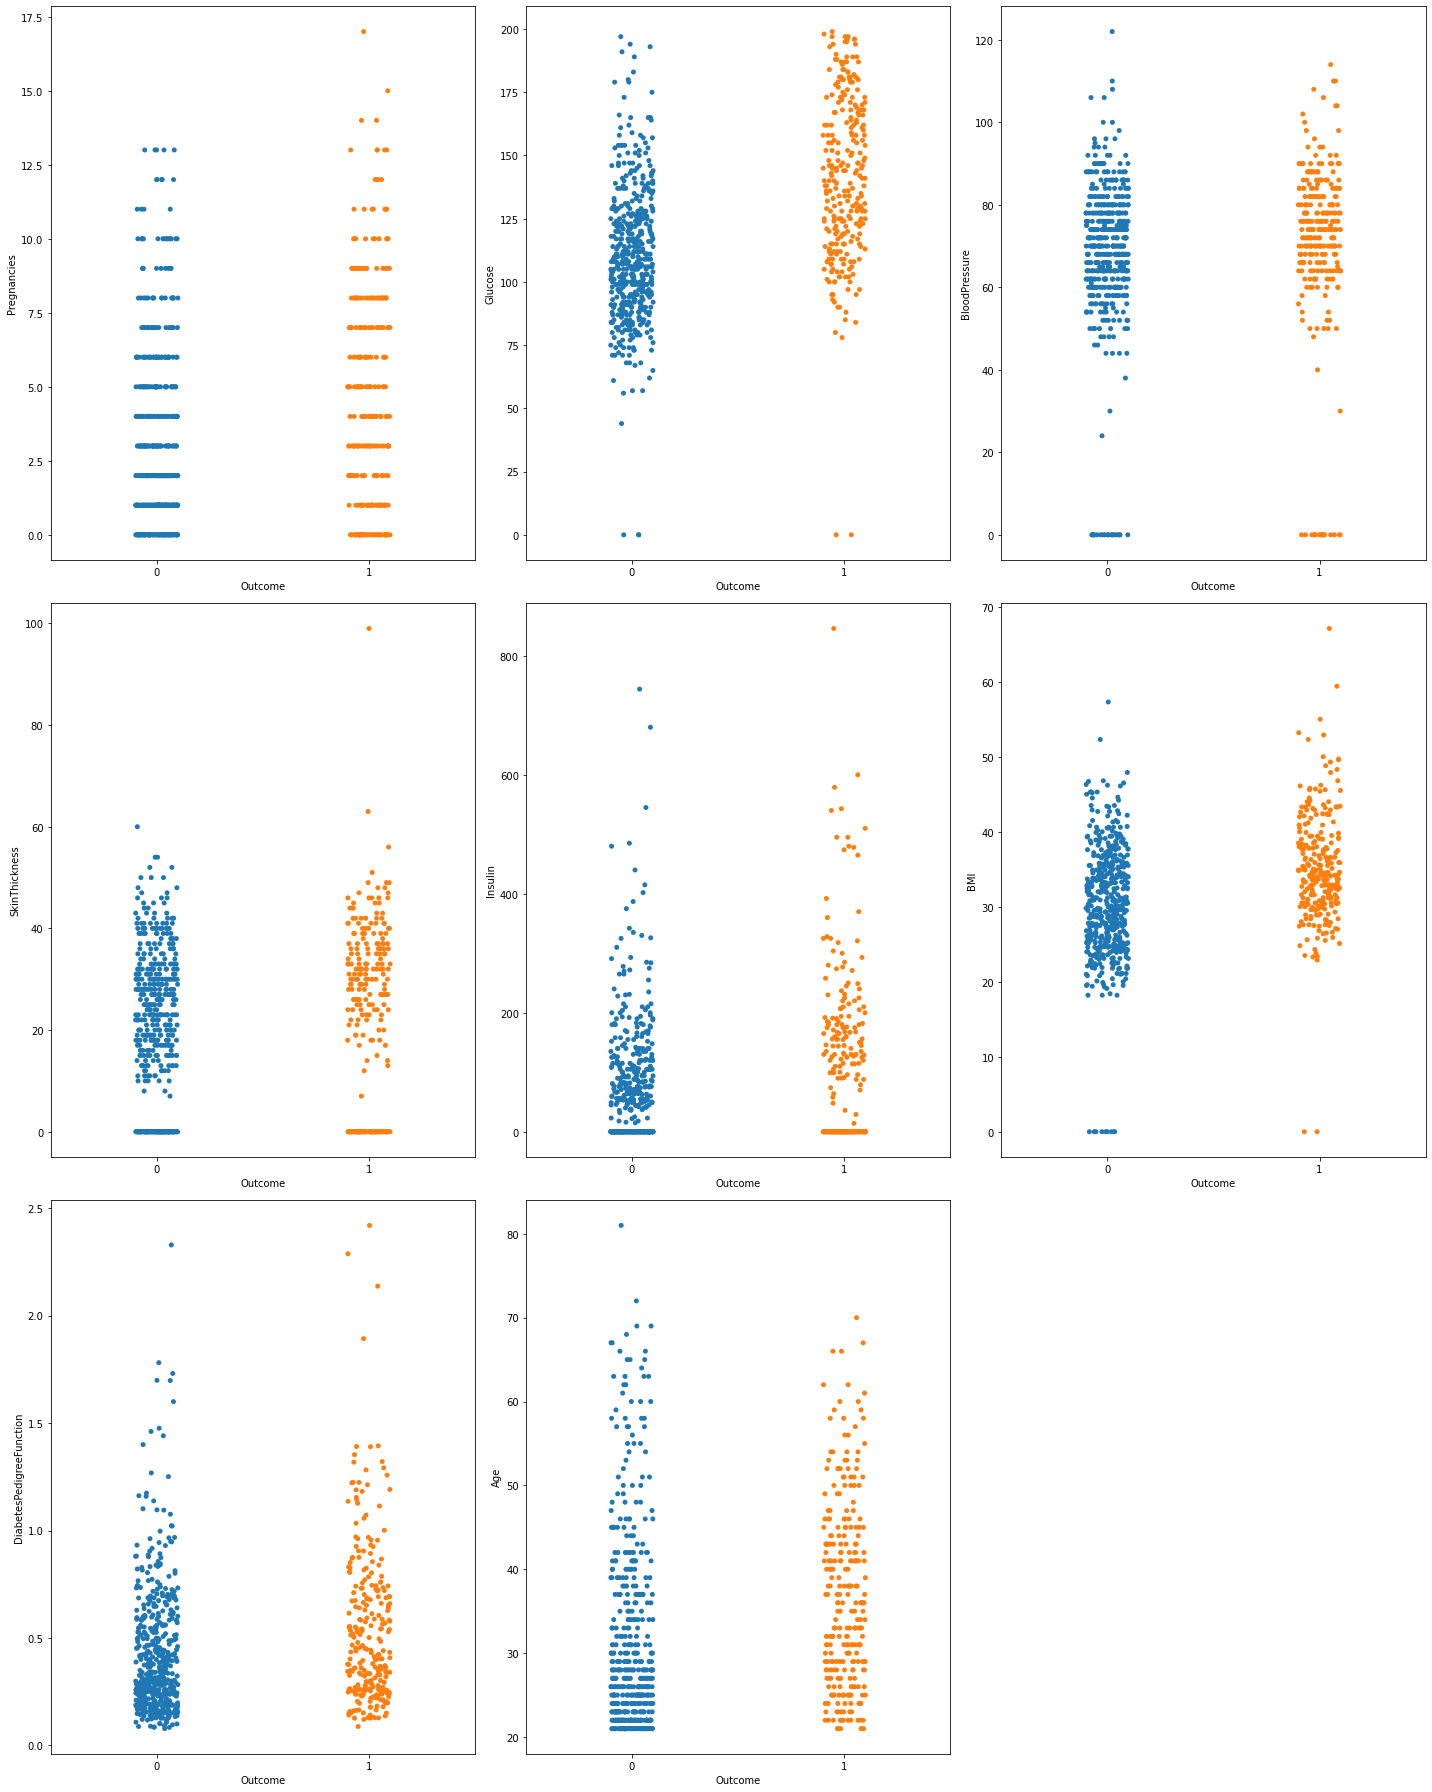

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [19]:
data['Outcome'] = data['Outcome'].replace([1,0],['Diabetes','No_Diabetes'])

In [20]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [27]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
print(model.coef_)
print(model.intercept_)

[[-0.18823163 -1.13335776  0.18631388  0.02422067  0.10468258 -0.81150478
  -0.14358094 -0.41370604]]
[0.87964347]


In [30]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
y_pred=model.predict(X_test)

In [32]:
y_pred

array(['No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes',
       'Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'No_Diabetes', 'No_Diabetes',
       'Diabetes', 'No_Diabetes', 'Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'Diabetes', 'No_Diabetes', 'Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
 

In [33]:
model.score(X_test,y_test)

0.7359307359307359

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Diabetes       0.62      0.62      0.62        80
 No_Diabetes       0.80      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [35]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 50,  30],
       [ 31, 120]], dtype=int64)

In [36]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [37]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7359307359307359

In [38]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.625

In [39]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6172839506172839

In [40]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6211180124223602

##New Data Prediction


In [41]:
import numpy as np

In [42]:
np_array = data.to_numpy()

In [43]:
np_array

array([[6, 148, 72, ..., 0.627, 50, 'Diabetes'],
       [1, 85, 66, ..., 0.351, 31, 'No_Diabetes'],
       [8, 183, 64, ..., 0.672, 32, 'Diabetes'],
       ...,
       [5, 121, 72, ..., 0.245, 30, 'No_Diabetes'],
       [1, 126, 60, ..., 0.349, 47, 'Diabetes'],
       [1, 93, 70, ..., 0.315, 23, 'No_Diabetes']], dtype=object)

In [44]:
np_arrayX = X.to_numpy()

In [45]:
np_arrayY = y.to_numpy()

In [46]:
np_arrayX

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [47]:
np_arrayY

array(['Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'Diabetes', 'No_Diabetes', 'Diabetes', 'Diabetes',
       'No_Diabetes', 'Diabetes', 'No_Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'No_Dia

In [48]:
np_arrayX[0].reshape(1,-1)

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

In [49]:
scaler.transform(np_arrayX[0].reshape(1,-1))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.69748316,  0.84033873,  0.12804365,  0.94130925, -0.6936878 ,
         0.21324813,  0.45960931,  1.44979298]])

In [50]:
model.predict(scaler.transform(np_arrayX[0].reshape(1,-1)))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Diabetes'], dtype=object)

##Pickling The Model File For Deployement

In [51]:
import pickle

In [52]:
pickle.dump(model,open('regmodel.pkl','wb'))

In [53]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [54]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))
## Prediction
pickled_model.predict(scaler.transform(np_arrayX[0].reshape(1,-1)))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Diabetes'], dtype=object)